In [64]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
root = Path(os.getcwd()).parent.parent

#Change for each one of where your data is. For me in Dataset I have all the three folders
parent_directory = os.path.dirname(root)
dataset_path = os.path.join(root,'Dataset')

ADVOCATE = "advocate"
RATEBEER = "ratebeer"
MATCHED = "matched"

ADVOCATE_PATH = os.path.join(dataset_path,ADVOCATE)
RATEBEER_PATH = os.path.join(dataset_path,RATEBEER)
MATCHED_PATH = os.path.join(dataset_path,MATCHED)

In [75]:
ratings_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'ratings-advocate.csv'))
ratings_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'ratings.csv'))

beers_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'beers_cleaned.csv')) #the cleaned one
beers_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'beers_cleaned.csv')) #the cleaned one

In [76]:
beers_advocate = pd.read_csv(os.path.join(ADVOCATE_PATH,'beers_cleaned.csv')) #the cleaned one
beers_ratebeer = pd.read_csv(os.path.join(RATEBEER_PATH,'beers_cleaned.csv')) #the cleaned one

In [77]:
variance_advocate = ratings_advocate.groupby("beer_id").rating.std()
variance_ratebeer = ratings_ratebeer.groupby("beer_id").rating.std()
variance_advocate.name = 'var_rating'
variance_ratebeer.name = 'var_rating'
print(len(variance_advocate))
print(len(variance_ratebeer))

247982
396690


In [78]:
beers_advocate = beers_advocate.merge(variance_advocate, on='beer_id', how='left') #the std needs at least 2 reviews otherwise it's a Nan
beers_ratebeer = beers_ratebeer.merge(variance_ratebeer, on='beer_id', how='left')


beers_advocate = beers_advocate.dropna(subset='var_rating')
beers_ratebeer = beers_ratebeer.dropna(subset='var_rating')

In [79]:
sem_advocate = ratings_advocate.groupby("beer_id").rating.sem()
sem_ratebeer = ratings_ratebeer.groupby("beer_id").rating.sem()
sem_advocate.name = 'sem_rating'
sem_ratebeer.name = 'sem_rating'

beers_advocate = beers_advocate.merge(sem_advocate, on='beer_id', how='left') #the sem needs at least 2 reviews otherwise it's a Nan
beers_ratebeer = beers_ratebeer.merge(sem_ratebeer, on='beer_id', how='left')


beers_advocate = beers_advocate.dropna(subset='sem_rating')
beers_ratebeer = beers_ratebeer.dropna(subset='sem_rating')

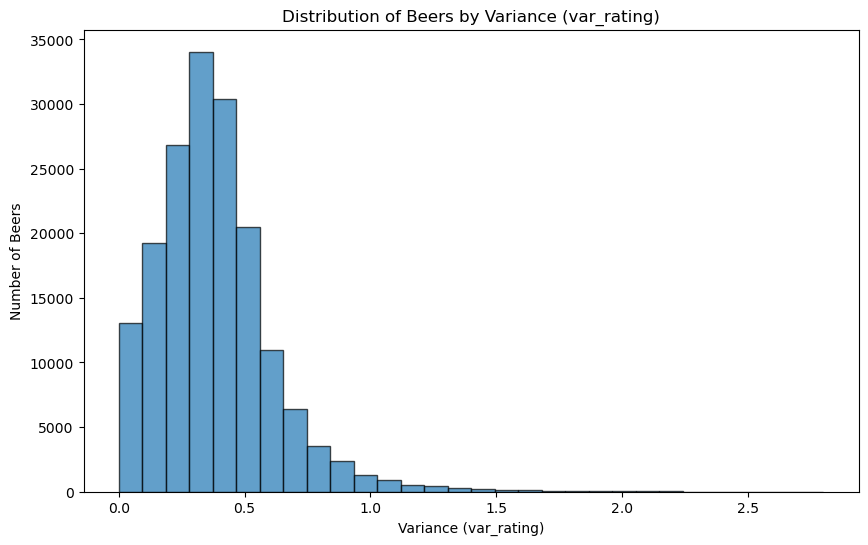

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(beers_advocate['var_rating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Variance (var_rating)')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance (var_rating)')
plt.show()

Text(0.5, 1.0, 'Distribution of Beers by Variance')

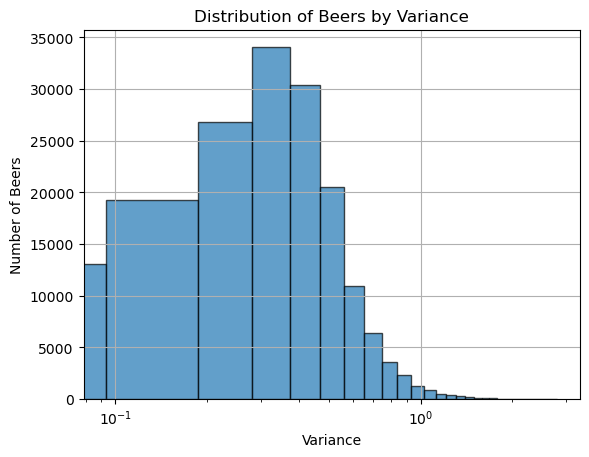

In [123]:
#plt.hist(beers_advocate['var_rating'].dropna(), bins=30, edgecolor='k', alpha=0.7)

beers_advocate.hist(['var_rating'], bins=30,edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Variance')
plt.ylabel('Number of Beers')
plt.title('Distribution of Beers by Variance')

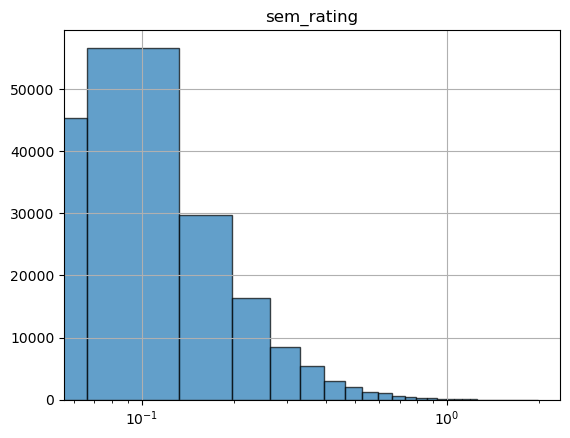

In [124]:
beers_advocate.hist(['sem_rating'], bins=30,edgecolor='k', alpha=0.7)
plt.xscale('log')

In [70]:
ratings_advocate.sample(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
4258481,Lips Of Faith - Pluot,93319,New Belgium Brewing,192,Tripel,10.0,1379412000,abex44,abex44.694679,NaN,NaN,NaN,NaN,NaN,4.00,NaN,False
4496004,Kirsch Gose,156202,Victory Brewing Company - Downingtown,345,Gose,4.7,1428746400,Enochase04,enochase04.781866,3.75,3.75,3.75,3.75,3.75,3.75,NaN,False


In [ ]:
attributes_of_interest = ["appearance","aroma","palate","taste","overall"] #not abv and style since they are not subject to interpretation. ANd we do not know yet how to analyse text
ratings_advocate_without_nan = ratings_advocate.copy()
ratings_ratebeer_without_nan = ratings_ratebeer.copy()

for attribute in attributes_of_interest:
    ratings_advocate_without_nan = ratings_advocate_without_nan.dropna(subset=attribute)
    ratings_ratebeer_without_nan = ratings_ratebeer_without_nan.dropna(subset=attribute)

print(len(ratings_advocate),len(ratings_advocate_without_nan))
print(len(ratings_ratebeer),len(ratings_ratebeer_without_nan))

8393032 4769675
7122074 7122074


In [92]:
beers_advocate_attribute = beers_advocate.copy()
beers_ratebeer_attribute = beers_advocate.copy()

In [93]:

for attribute in attributes_of_interest:
    print(attribute)
    attribute_advocate = ratings_advocate_without_nan.groupby("beer_id")[attribute].std()
    attribute_ratebeer = ratings_ratebeer_without_nan.groupby("beer_id")[attribute].std()
    attribute_advocate.name = 'var_'+attribute
    attribute_ratebeer.name = 'var_'+attribute
    beers_advocate_attribute = beers_advocate_attribute.merge(attribute_advocate, on='beer_id', how='left') #the sem needs at least 2 reviews otherwise it's a Nan
    beers_ratebeer_attribute = beers_ratebeer_attribute.merge(attribute_ratebeer, on='beer_id', how='left')

for attribute in attributes_of_interest:
    beers_advocate_attribute = beers_advocate_attribute.dropna(subset='var_'+attribute)
    beers_ratebeer_attribute = beers_ratebeer_attribute.dropna(subset='var_'+attribute)
    

appearance
aroma
palate
taste
overall


In [94]:
beers_advocate_attribute.sample()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings,var_rating,sem_rating,var_appearance,var_aroma,var_palate,var_taste,var_overall
81592,111362,Sour Puss,158,Great Divide Brewing Company,Flanders Red Ale,12,3,3.88,7.0,3.9075,3,0.164821,0.04758,0.25,0.144338,0.25,0.144338,0.144338


**PCA with rating**

In [140]:
attributes_of_interest_for_PCA = []
for attributes in attributes_of_interest:
    attributes_of_interest_for_PCA.append('var_'+attribute)
attributes_of_interest_for_PCA.append('var_rating')
print(attributes_of_interest_for_PCA)

['var_overall', 'var_overall', 'var_overall', 'var_overall', 'var_overall', 'var_overall', 'var_rating']


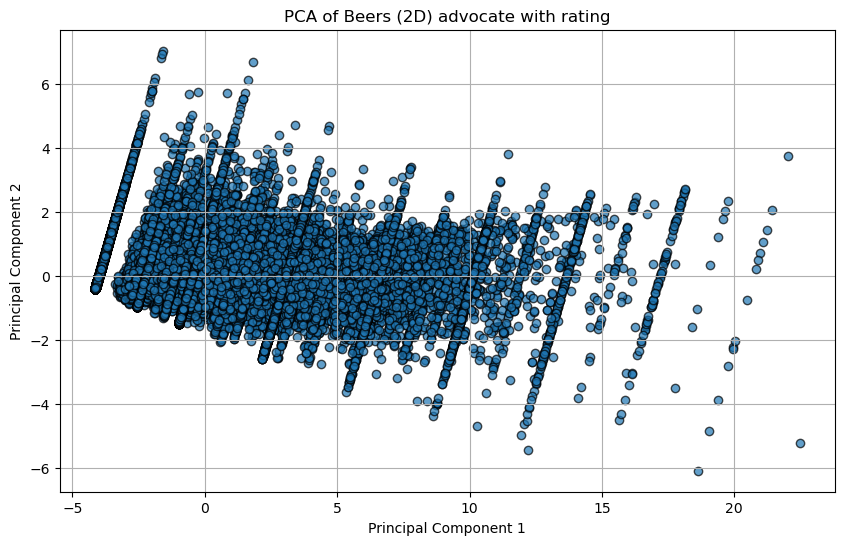

principal components: [[ 0.38583129  0.38583129  0.38583129  0.38583129  0.38583129  0.38583129
   0.32681082]
 [-0.13341996 -0.13341996 -0.13341996 -0.13341996 -0.13341996 -0.13341996
   0.94508978]]
Explained variance [0.95415524 0.04584476]


In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_for_pca = beers_advocate_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) advocate with rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)

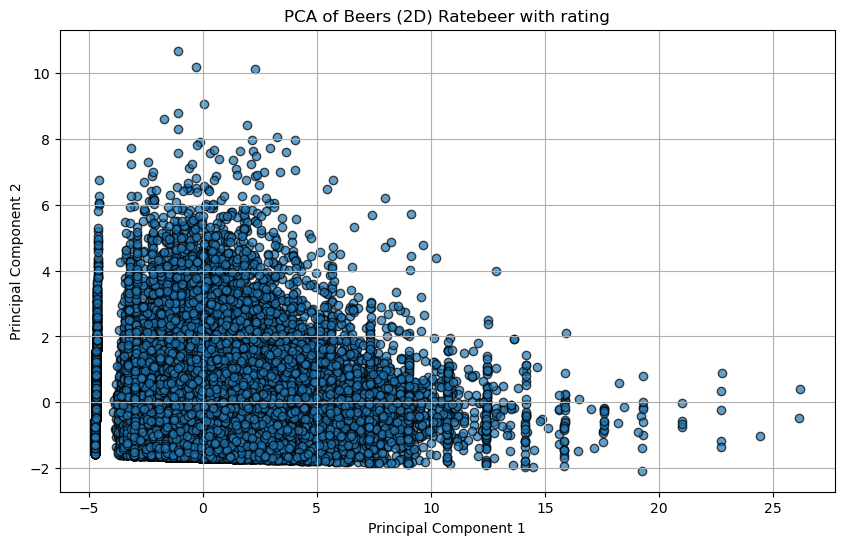

principal components: [[ 0.40816089  0.40816089  0.40816089  0.40816089  0.40816089  0.40816089
   0.02069158]
 [-0.0084473  -0.0084473  -0.0084473  -0.0084473  -0.0084473  -0.0084473
   0.99978591]]
Explained variance [0.85744893 0.14255107]


In [143]:
data_for_pca = beers_ratebeer_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) Ratebeer with rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)


**PCA without rating**

In [144]:
attributes_of_interest_for_PCA = []
for attributes in attributes_of_interest:
    attributes_of_interest_for_PCA.append('var_'+attribute)
print(attributes_of_interest_for_PCA)

['var_overall', 'var_overall', 'var_overall', 'var_overall', 'var_overall', 'var_overall']


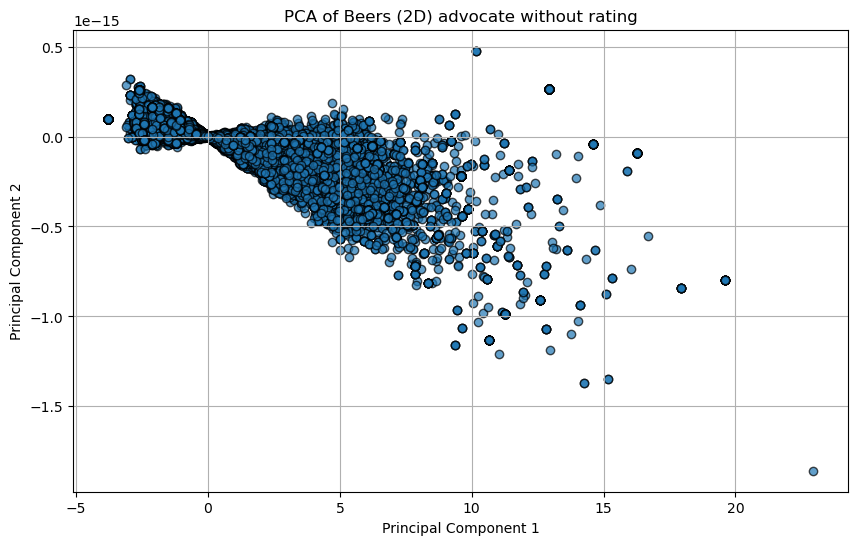

principal components: [[ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]
 [ 0.3250834   0.72961031 -0.42154718 -0.11915876 -0.11915876 -0.39482899]]
Explained variance [1.00000000e+00 1.46710397e-16]


In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_for_pca = beers_advocate_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) advocate without rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)


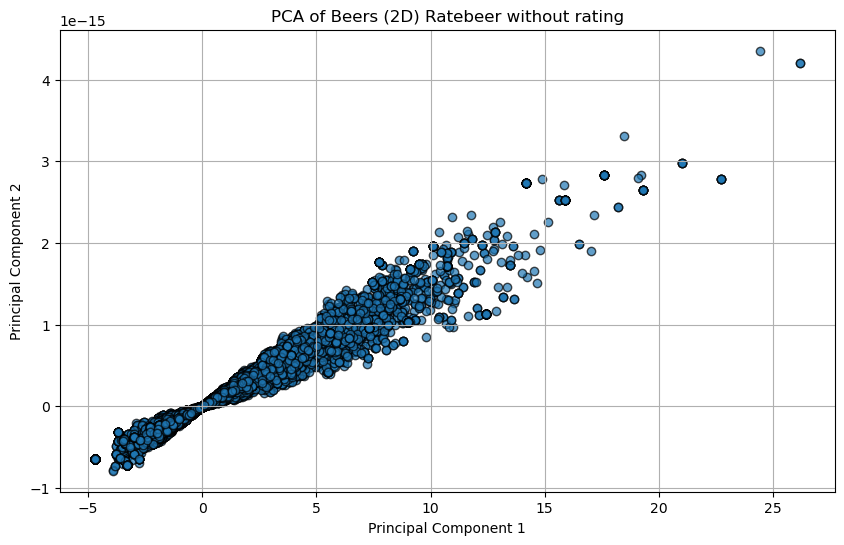

principal components: [[ 0.40824829  0.40824829  0.40824829  0.40824829  0.40824829  0.40824829]
 [ 0.10181874  0.80590771  0.04870496 -0.24481365 -0.24481365 -0.46680412]]
Explained variance [1.00000000e+00 6.30033473e-17]


In [147]:
data_for_pca = beers_ratebeer_attribute[attributes_of_interest_for_PCA]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Beers (2D) Ratebeer without rating')
plt.grid(True)
plt.show()

principal_components_loadings = pca.components_
explained_variance = pca.explained_variance_ratio_
print("principal components:",principal_components_loadings)
print("Explained variance",explained_variance)
